#### Problem Statement

Build the ANN model to predict whether a Customer will leave the bank or not.

+ **CustomerID**: Customer ID of the Customer.
+ **Surname**: Last Names of the Customer.
+ **CreditScore**: Credit Score of the Customer.
+ **Geography**: Countnry or Location of the Customer.
+ **Gender**: Gender of the Customer.
+ **Age**: Age of the Customer.
+ **Tenure**: Total years with the BanK.
+ **Balance**: Bank Balance of the Customer.
+ **NumOfProducts**: Number of Products Customer has with a bank.
+ **HasCrCard**: Whether a customer has a credit card. [1: Yes, 0:No]
+ **IsActiveMember**: Whether a customer is currently active with a bank or not. [1: Yes, 0:No]
+ **EstimatedSalary**: Estimated Salary of the Customer.
+ **Exited**: Whether a customer left a bank or not [1: Yes, 0:No]

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Data Preprocessing

#### Importing the dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
X = data.iloc[:, 3:-1]
y = data.iloc[:, -1]

In [7]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Encoding categorical data

Label Encoding the "Gender" column

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

In [10]:
X['Geography'].unique()

array([0, 2, 1])

In [11]:
X['Gender'].unique()

array([0, 1])

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the ANN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

#### Initializing the ANN

In [16]:
ann = Sequential()

#### Adding the input layer

In [17]:
ann.add(Input(10))

#### Adding the hidden layer

In [18]:
ann.add(Dense(4, activation='relu'))

In [19]:
#ann.add(Dense(3, activation='relu'))

#### Adding the output layer

In [20]:
ann.add(Dense(1, activation='sigmoid'))

### Model Compilation

In [21]:
from tensorflow.keras.optimizers import Adam

In [22]:
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [23]:
history = ann.fit(X_train, y_train, 
                  epochs = 50,
                 validation_data = (X_test, y_test),
                 batch_size = 20)

Epoch 1/50
400/400 [==============================] - 9s 8ms/step - loss: 0.6731 - accuracy: 0.6521 - val_loss: 0.5411 - val_accuracy: 0.7885
Epoch 2/50
400/400 [==============================] - 2s 5ms/step - loss: 0.5149 - accuracy: 0.7934 - val_loss: 0.4839 - val_accuracy: 0.7975
Epoch 3/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4777 - accuracy: 0.7961 - val_loss: 0.4619 - val_accuracy: 0.7930
Epoch 4/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4599 - accuracy: 0.7949 - val_loss: 0.4507 - val_accuracy: 0.7955
Epoch 5/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4502 - accuracy: 0.7969 - val_loss: 0.4442 - val_accuracy: 0.7980
Epoch 6/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4438 - accuracy: 0.7984 - val_loss: 0.4389 - val_accuracy: 0.8020
Epoch 7/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4386 - accuracy: 0.8010 - val_loss: 0.4331 - val_accuracy: 0.8050
Epoch 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

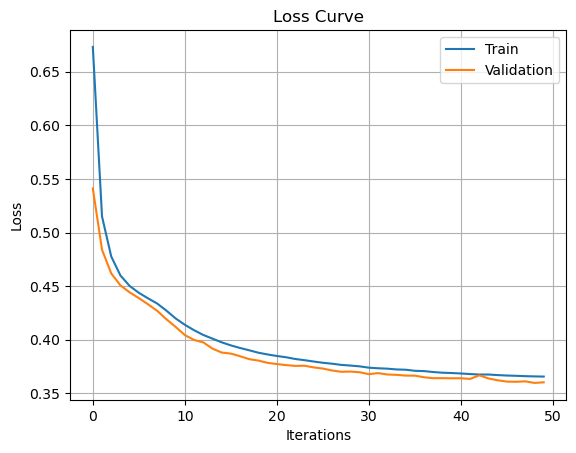

In [25]:
history = ann.history.history

train_loss = history['loss']
val_loss = history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0,1)
plt.legend(['Train', 'Validation'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid()
plt.show()

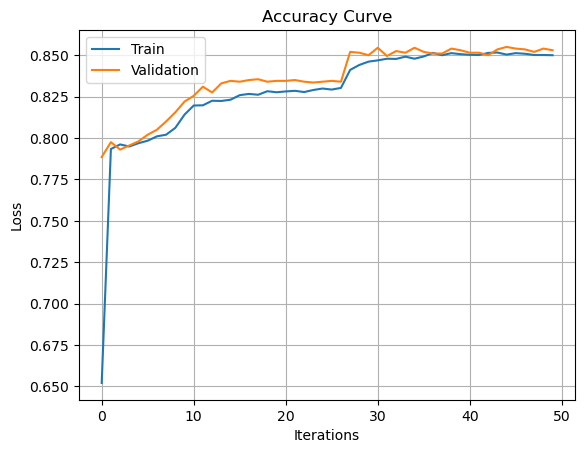

In [26]:
train_acc = history['accuracy']
val_acc = history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train', 'Validation'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
#plt.ylim(0,300)
plt.title('Accuracy Curve')
plt.grid()
plt.show()

### Making the predictions and evaluating the model

In [27]:
y_pred = ann.predict(X_test).flatten()

63/63 [==============================] - 1s 3ms/step


In [28]:
pd.DataFrame({'Actuals': y_test, 'Preds': y_pred.round()})

,Actuals,Preds
9394,0,0.0
898,1,0.0
2398,0,0.0
5906,0,0.0
2343,0,0.0
...,...,...
1037,0,0.0
2899,0,0.0
9549,0,0.0
2740,0,0.0


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
accuracy = accuracy_score(y_pred.round(), y_test)
accuracy

0.853

In [33]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.75      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



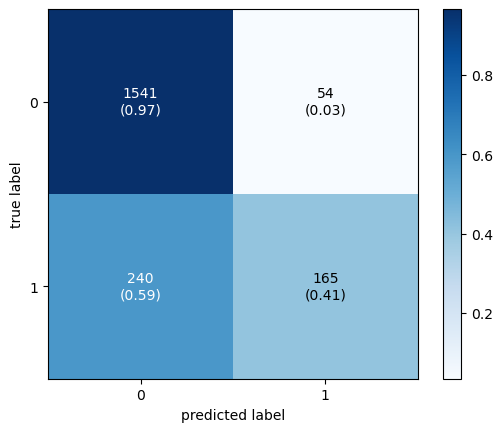

In [34]:
cm = confusion_matrix(y_test, y_pred.round())

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()